In [1]:
# import os
# os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from app.analysis import Quote
quote = Quote(Quote.screen_securities(min_assets=12, min_ratio=10, max_ratio=40), 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
from 2019-07-26 to 2019-10-04 - 377


In [9]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

156


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
TGT,46,0.476431,1.543947,0.304210,26.278497,7.382780
VST,46,0.446036,0.526863,0.833785,24.408063,3.793734
KR,46,0.372996,0.751401,0.487423,16.216395,6.252381
DG,46,0.348940,0.840603,0.407081,16.670290,5.181376
DHI,46,0.311482,0.468779,0.650063,18.438152,2.910894
KLAC,46,0.298602,0.695837,0.419432,16.176834,9.671431
BF-B,46,0.282936,0.597463,0.462272,14.037377,5.092018
NTES,46,0.278915,1.318201,0.206470,10.778633,11.332441
HCP,46,0.273925,0.449341,0.594602,14.731355,6.251736


In [10]:
ratios = []
for _ in range(6):
    quote.setup_mask(set(stats.index) - {s for _, r in ratios for s in r})
    ratios.append(quote.optimize_portfolio(max_count=3).peekitem())
sorted(ratios, reverse=True)

evicted TMO 0.821 -0.424
evicted A 0.833 -0.422
evicted MDLZ 0.840 -0.281
evicted GIS 0.748 -0.149
evicted SO 0.756 -0.341
evicted CDW 0.718 -0.194
evicted SNY 0.786 -0.242
evicted CB 0.799 -0.304
evicted TM 0.853 -0.457
evicted LOW 0.888 -0.369
evicted NDAQ 0.825 -0.173
evicted ATO 0.857 -0.298
evicted HIG 0.820 0.032
evicted NVR 0.490 -0.335
evicted LSXMA 0.873 -0.476
evicted K 0.613 -0.452
evicted VMC 0.682 -0.178
evicted QCOM 0.872 -0.458
evicted NGG 0.877 -0.361
evicted SNN 0.773 -0.405
evicted AEE 0.861 -0.303
evicted MKL 0.799 0.008
evicted UN 0.734 -0.430
evicted EA 0.784 -0.401
evicted AEP 0.806 -0.124
evicted ED 0.843 -0.258
evicted AKAM 0.492 -0.247
evicted PPL 0.783 -0.445
evicted ABB 0.823 -0.470
evicted PEP 0.863 -0.330
evicted KO 0.768 -0.277
evicted AGR 0.755 -0.309
evicted XEL 0.891 -0.412
evicted WMT 0.694 -0.252
evicted PLD 0.808 -0.108
evicted TDG 0.871 -0.439
evicted BAX 0.853 -0.124
evicted CINF 0.776 -0.196
evicted DHI 0.644 -0.467
evicted ALL 0.764 -0.369
evicte

[((0.938, 0.938, 0.233), {'DHI': 0.247, 'T': 0.431, 'WEC': 0.322}),
 ((1.014, 1.014, 0.237), {'BF-B': 0.35, 'HCP': 0.241, 'LNT': 0.409}),
 ((1.031, 1.031, 0.232), {'BMY': 0.268, 'DUK': 0.732}),
 ((1.112, 1.112, 0.316), {'NEE': 0.61, 'VST': 0.39}),
 ((1.241, 1.241, 0.25), {'ES': 1}),
 ((1.271, 1.271, 0.232), {'CELG': 0.296, 'ETR': 0.487, 'SYY': 0.217})]

{'CELG': 0.07, 'ETR': 0.12, 'SYY': 0.05, 'ES': 0.25, 'NEE': 0.15, 'VST': 0.1, 'BMY': 0.07, 'DUK': 0.18}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,46.0,0.259362,0.190333,-0.189958,0.163050,0.273563,0.385924,0.750373,1.327232,13.855348,1.488387
ES,46.0,0.250180,0.196158,-0.186991,0.120453,0.243793,0.424601,0.611182,1.241012,13.015376,1.619276
ETR,46.0,0.269511,0.271409,-0.512785,0.129868,0.311750,0.417183,0.856582,0.968155,15.530040,2.872718
DUK,46.0,0.226130,0.226995,-0.268465,0.067172,0.217127,0.386585,0.752064,0.966470,13.007789,1.937654
VST,46.0,0.446036,0.526863,-0.768656,0.152754,0.390790,0.774717,1.568018,0.833785,24.408063,3.793734
NEE,46.0,0.233009,0.304535,-0.670560,0.075968,0.296581,0.463100,0.695475,0.742979,12.301367,3.298458
BMY,46.0,0.247996,0.332607,-0.660235,-0.001107,0.252876,0.472812,0.914660,0.725328,12.797848,3.550299
CELG,46.0,0.144341,0.214582,-0.419857,-0.015655,0.177998,0.264362,0.591829,0.641221,7.664942,2.518629
SYY,46.0,0.267586,0.419191,-0.812185,-0.009732,0.297948,0.458422,1.458611,0.622246,10.790734,5.289885


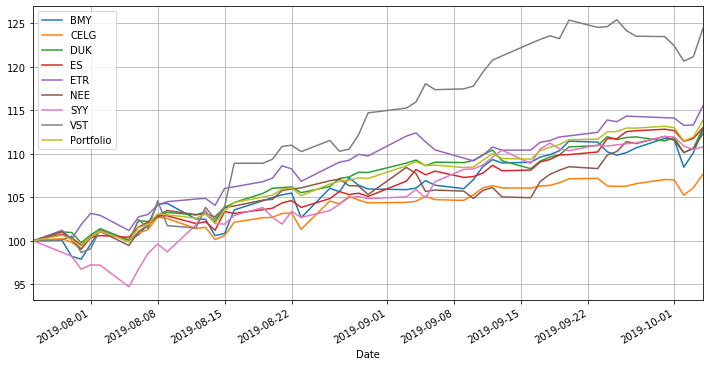

In [11]:
ratios = [
{'CELG': 0.296, 'ETR': 0.487, 'SYY': 0.217},
{'ES': 1},
{'NEE': 0.61, 'VST': 0.39},
{'BMY': 0.268, 'DUK': 0.732},
]
ratio = {}
for rt in ratios:
    for s in rt:
        ratio[s] = round(rt[s] / len(ratios), 2)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)